# Use decision trees to prepare a model on fraud data 
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [79]:
# !pip install category_encoders
import category_encoders as ce
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [80]:
data = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Decision Tree\Fraud_check.csv')
data.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [81]:
data.shape

(600, 6)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


There are no missing values

In [83]:
# checking duplicates
data.duplicated().any()

False

No duplicates found

In [84]:
# desriptive statistics
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# Types of Variable

## 1. Categorical Variable

In [85]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical varaibles are :\n\n', categorical)

There are 3 categorical variables

The categorical varaibles are :

 ['Undergrad', 'Marital.Status', 'Urban']


In [86]:
data[categorical].head()

,Undergrad,Marital.Status,Urban
0,NO,Single,YES
1,YES,Divorced,YES
2,NO,Married,YES
3,YES,Single,YES
4,NO,Married,NO


## 2. Numerical Variable

In [87]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 3 numerical variables

The numerical variables are : ['Taxable.Income', 'City.Population', 'Work.Experience']


In [88]:
data[numerical].head()

,Taxable.Income,City.Population,Work.Experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28


## Converting Categorical Variable to Numerical Value

In [89]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1


In [90]:
# Renaming Taxable.Income to Income
data.rename({'Taxable.Income': 'Income'},inplace=True, axis=1)
data.columns

Index(['Undergrad', 'Marital.Status', 'Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [91]:
# Adding a column 'Result'
data['Result'] = data['Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')
data.head(2)

,Undergrad,Marital.Status,Income,City.Population,Work.Experience,Urban,Result
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good


In [92]:
# Converting Column 'Result' to Numercial Variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Result'] = label_encoder.fit_transform(data['Result'])
data.head()

,Undergrad,Marital.Status,Income,City.Population,Work.Experience,Urban,Result
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [94]:
data['Result'].value_counts()

0    476
1    124
Name: Result, dtype: int64

<Axes: >

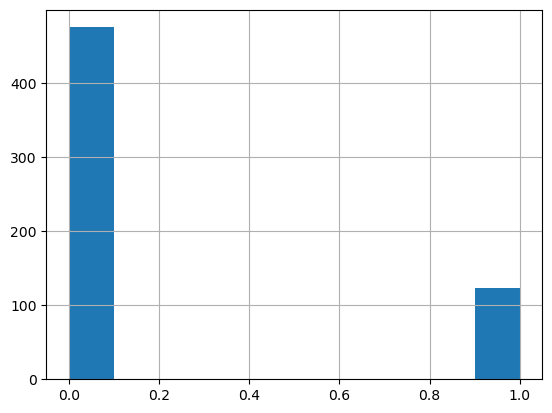

In [96]:
data['Result'].hist()

# Data Visualization

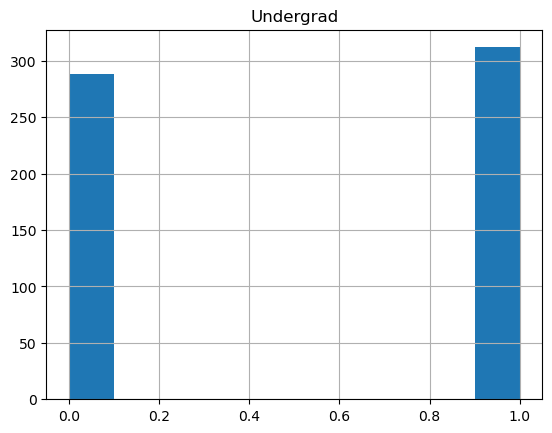

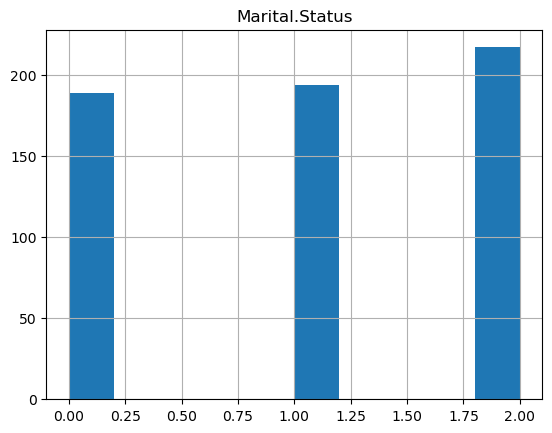

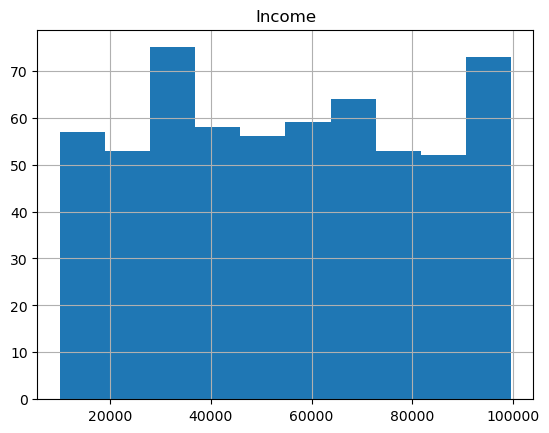

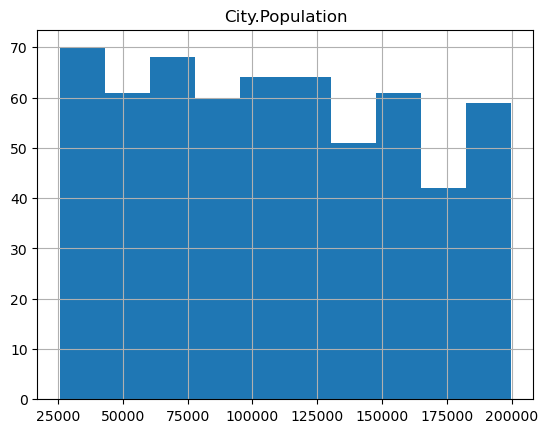

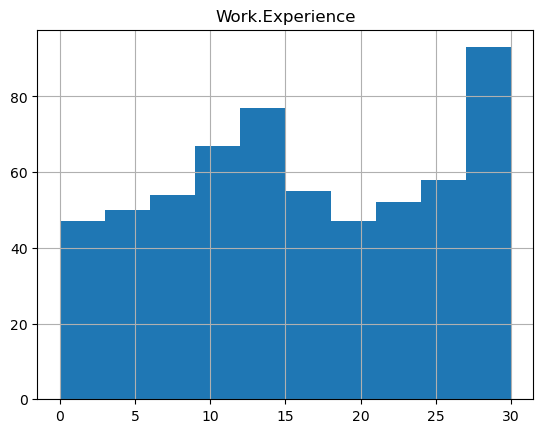

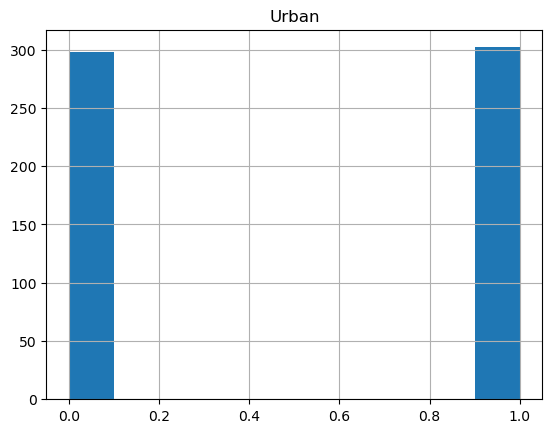

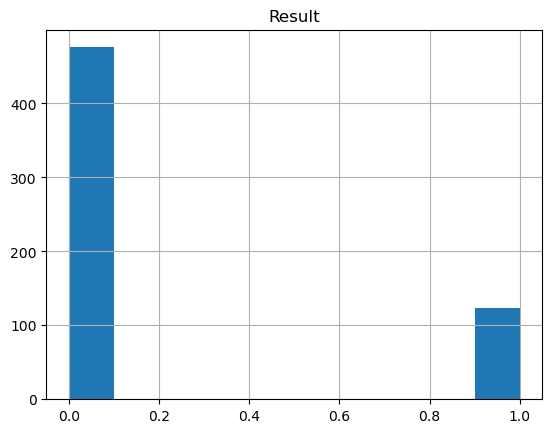

In [22]:
for col_name in data.columns.values:
    data.hist(column=col_name)

<Axes: >

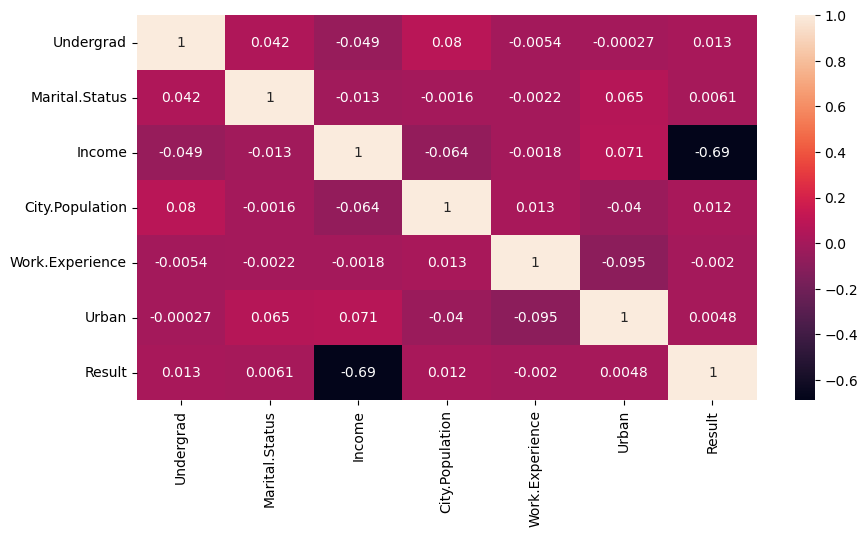

In [20]:
# correlation
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

## Segregating Features and Target Variable

In [25]:
X = data.iloc[:,0:5]
y = data['Result']

In [26]:
X.head(3)

,Undergrad,Marital.Status,Income,City.Population,Work.Experience
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30


In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Result, dtype: int32

In [28]:
# No of Good and Risky
y.value_counts()

0    476
1    124
Name: Result, dtype: int64

The dataset has got more Good than Risky

# Building Decision Tree Classifier using Entropy Criteria

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled

array([[ 0.93541435, -0.09857599, -0.10978121,  0.23808829, -0.63366623],
       [-1.06904497,  1.11912739, -0.85420509,  0.34915242, -1.65032935],
       [-1.06904497, -1.31627937,  1.59604355,  0.97751647,  0.04410919],
       ...,
       [-1.06904497, -0.09857599, -0.93067495,  0.43238102, -1.19847908],
       [-1.06904497, -1.31627937,  1.4058444 ,  0.05701843, -1.31144165],
       [ 0.93541435, -1.31627937, -0.84674555, -0.34574289,  0.83484718]])

In [37]:
X_test_scaled

array([[-1.06904497,  1.11912739, -1.15679466, -1.5178923 ,  0.3829969 ],
       [-1.06904497, -0.09857599,  0.51536653,  0.57918262,  0.49595947],
       [-1.06904497, -1.31627937,  0.34869362, -1.54541016,  1.39966003],
       [ 0.93541435, -0.09857599, -0.89280343,  0.18746021,  1.17373489],
       [-1.06904497, -1.31627937, -0.96605995, -1.44510698,  0.49595947],
       [-1.06904497, -1.31627937, -1.49664367,  1.57802514,  0.72188461],
       [-1.06904497,  1.11912739, -0.95882993, -0.12508385,  0.3829969 ],
       [ 0.93541435,  1.11912739,  1.14946573, -0.86197069, -0.29477852],
       [ 0.93541435, -1.31627937,  0.71206888,  0.68002186, -1.76329192],
       [ 0.93541435, -1.31627937, -1.50360591, -0.72759779,  1.62558517],
       [ 0.93541435,  1.11912739, -1.33398743, -0.37598077,  0.04410919],
       [-1.06904497, -1.31627937, -0.95072007,  1.79227129, -0.63366623],
       [ 0.93541435, -0.09857599,  0.55189916,  1.38349416, -0.85959137],
       [ 0.93541435, -0.09857599,  1.1

We are now ready with the training and testing set for building the model

# Decision Tree Classifier Model using Entropy Criteria

In [38]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
#Predicting on train data
pred_train1 = model1.predict(X_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

#Predicting on test data
pred_test1 = model1.predict(X_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)

Train data Accuracy is: 100.0
Test data Accuracy is: 100.0


In [40]:
#Predicting on test data
pred_test1 = model1.predict(X_test) 
pd.Series(pred_test1).value_counts() # getting the count of each category 

0    143
1     37
dtype: int64

In [41]:
pred_test1

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0])

In [42]:
# creating a cross-tabulation table/frequency distibution table
pd.crosstab(y_test,pred_test1) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Result,,
0,143,0
1,0,37


There are only true positives and true negatives, resulting to 100% accuracy.

In [44]:
# Accuracy 
np.mean(pred_test1==y_test)

1.0

## Visualizing Decision Tree

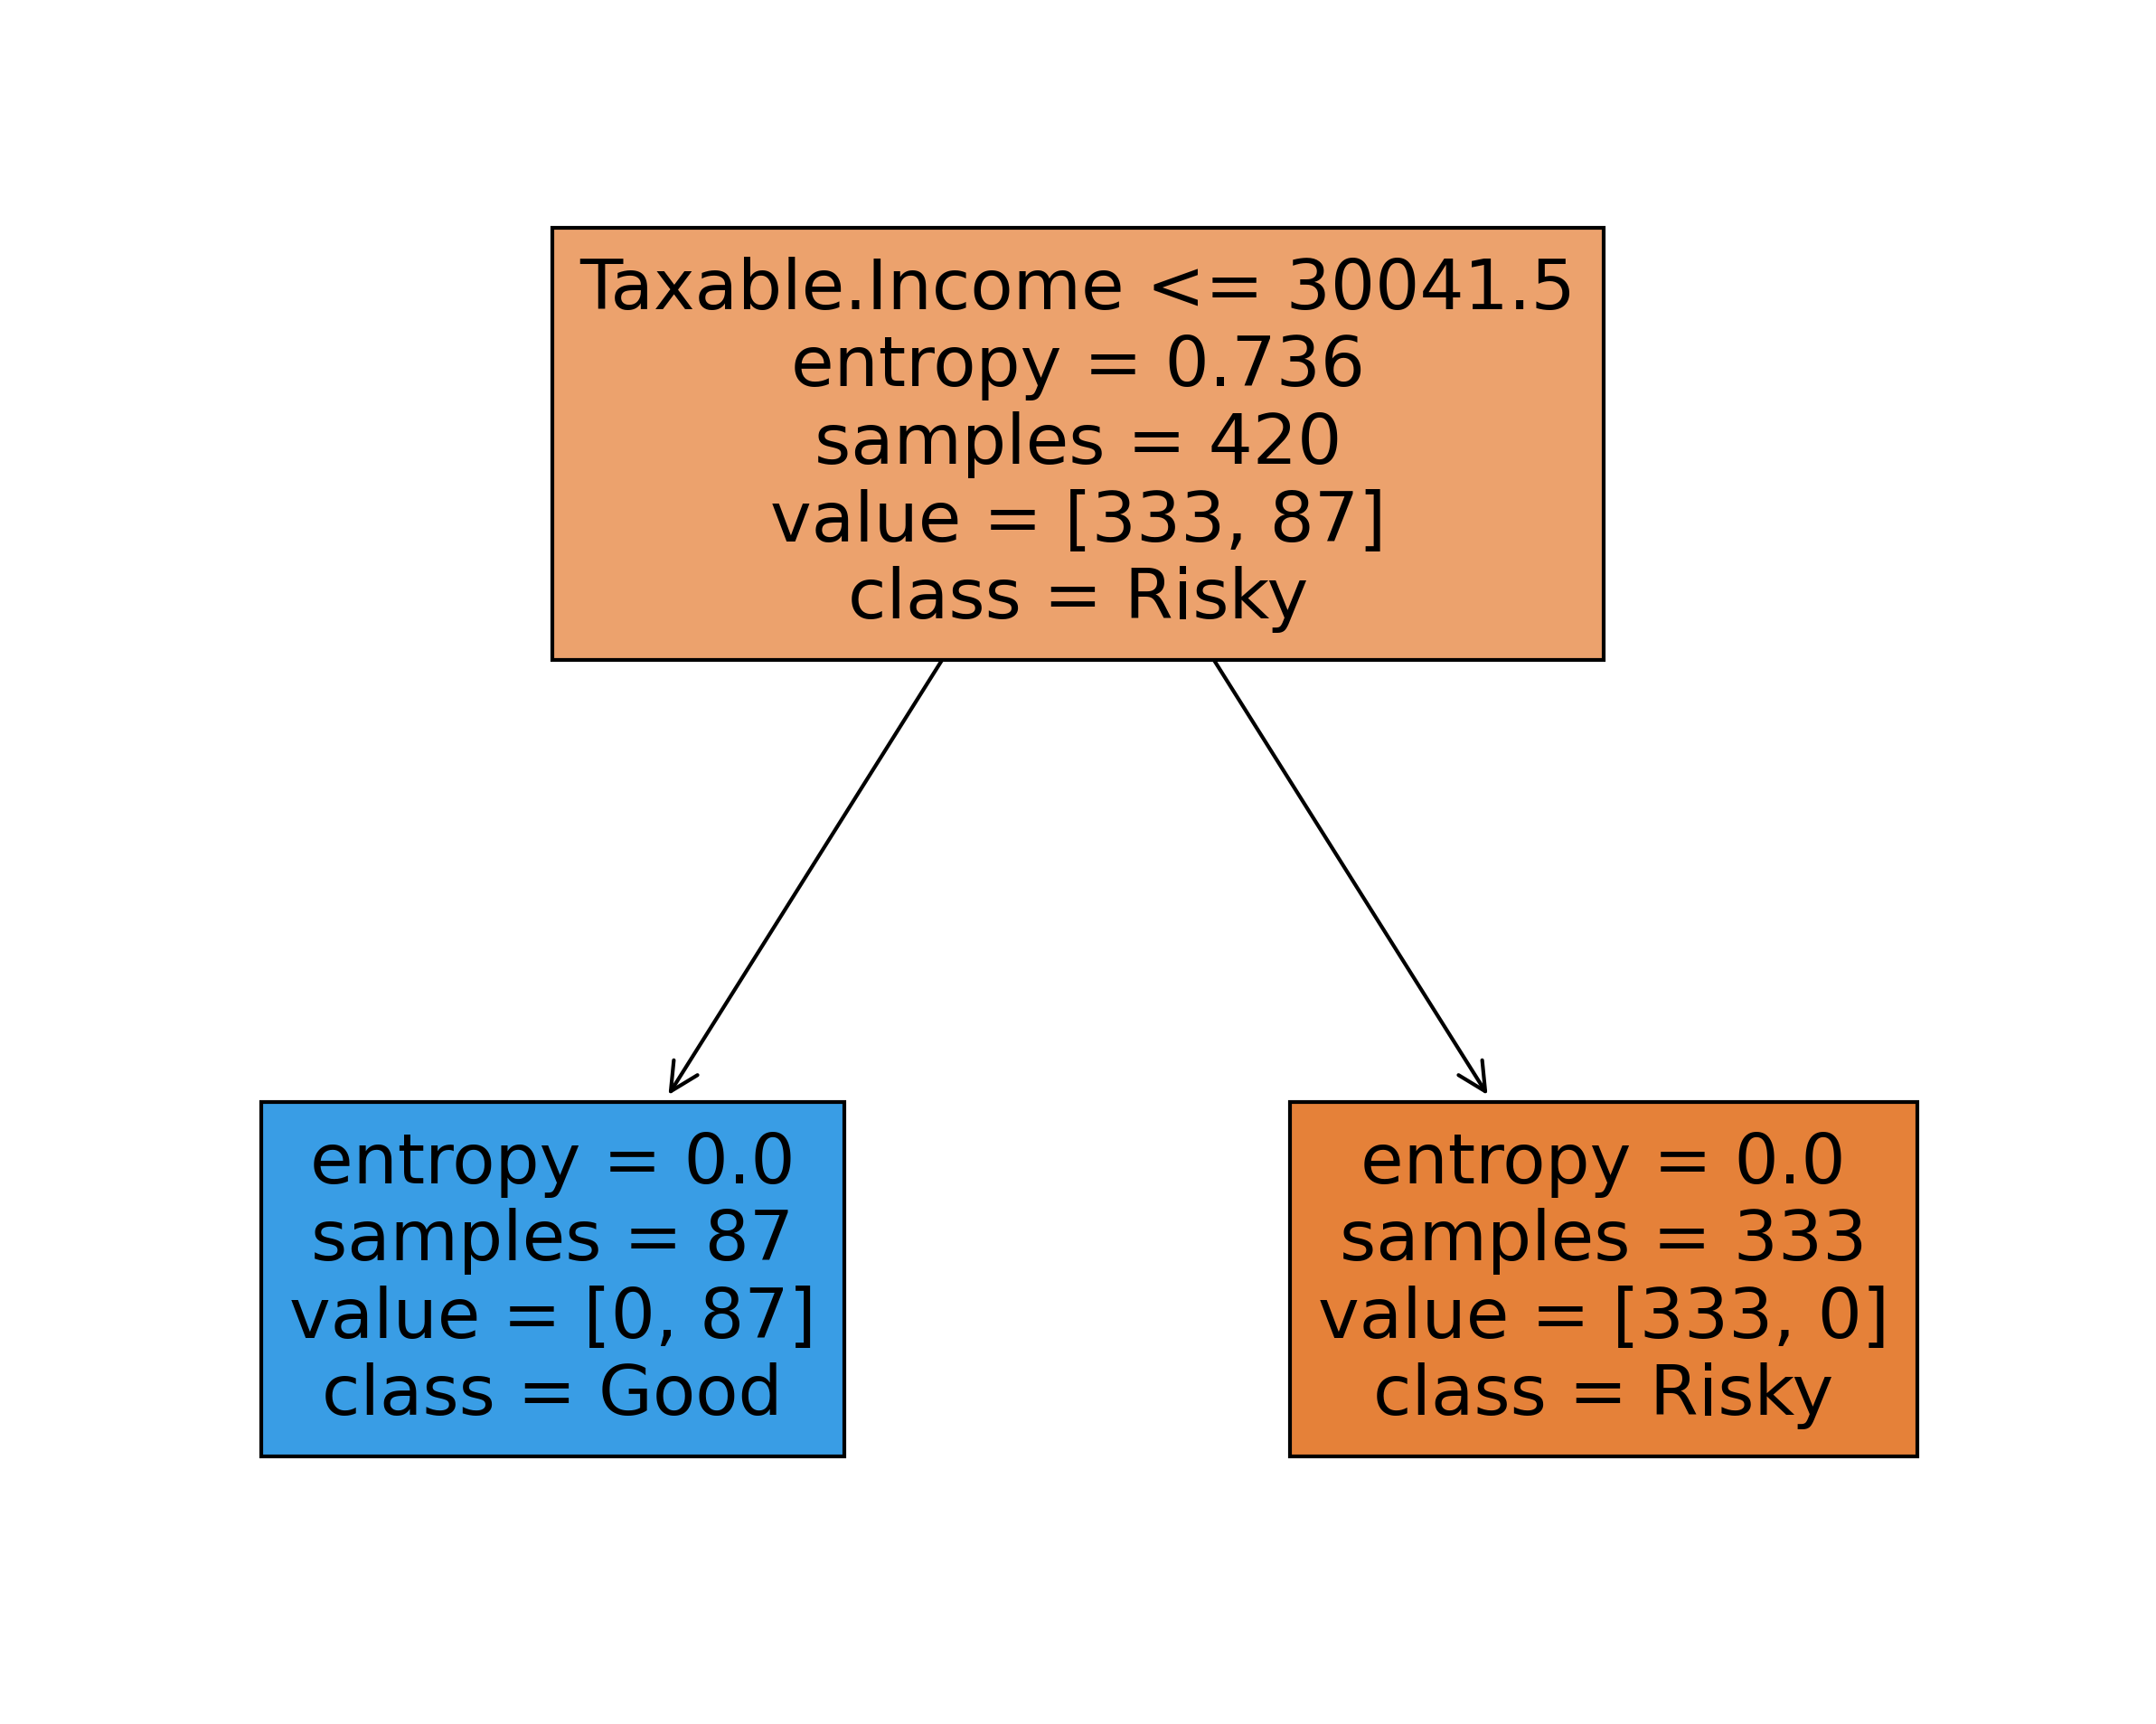

In [46]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Building Decision Tree Classifier (CART) using GINI Criteria

In [67]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [68]:
#Predicting on train data
pred_train1 = model_gini1.predict(X_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

#Predicting on test data
pred_test1 = model_gini1.predict(X_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)

Train data Accuracy is: 100.0
Test data Accuracy is: 100.0


In [69]:
#Prediction and computing the accuracy
pred=model_gini1.predict(X_test)
np.mean(pred_test1==y_test)

1.0

In [70]:
# making predictions on the test set x_test
pred_test1 = model_gini1.predict(x_test)    

# creating a Pandas Series
pd.Series(pred_test1).value_counts()

0    92
1    28
dtype: int64

Model predicted Good as '92' instances and Risky in '28' instances.

In [71]:
pred_test1

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

## Visualizing Decision Tree

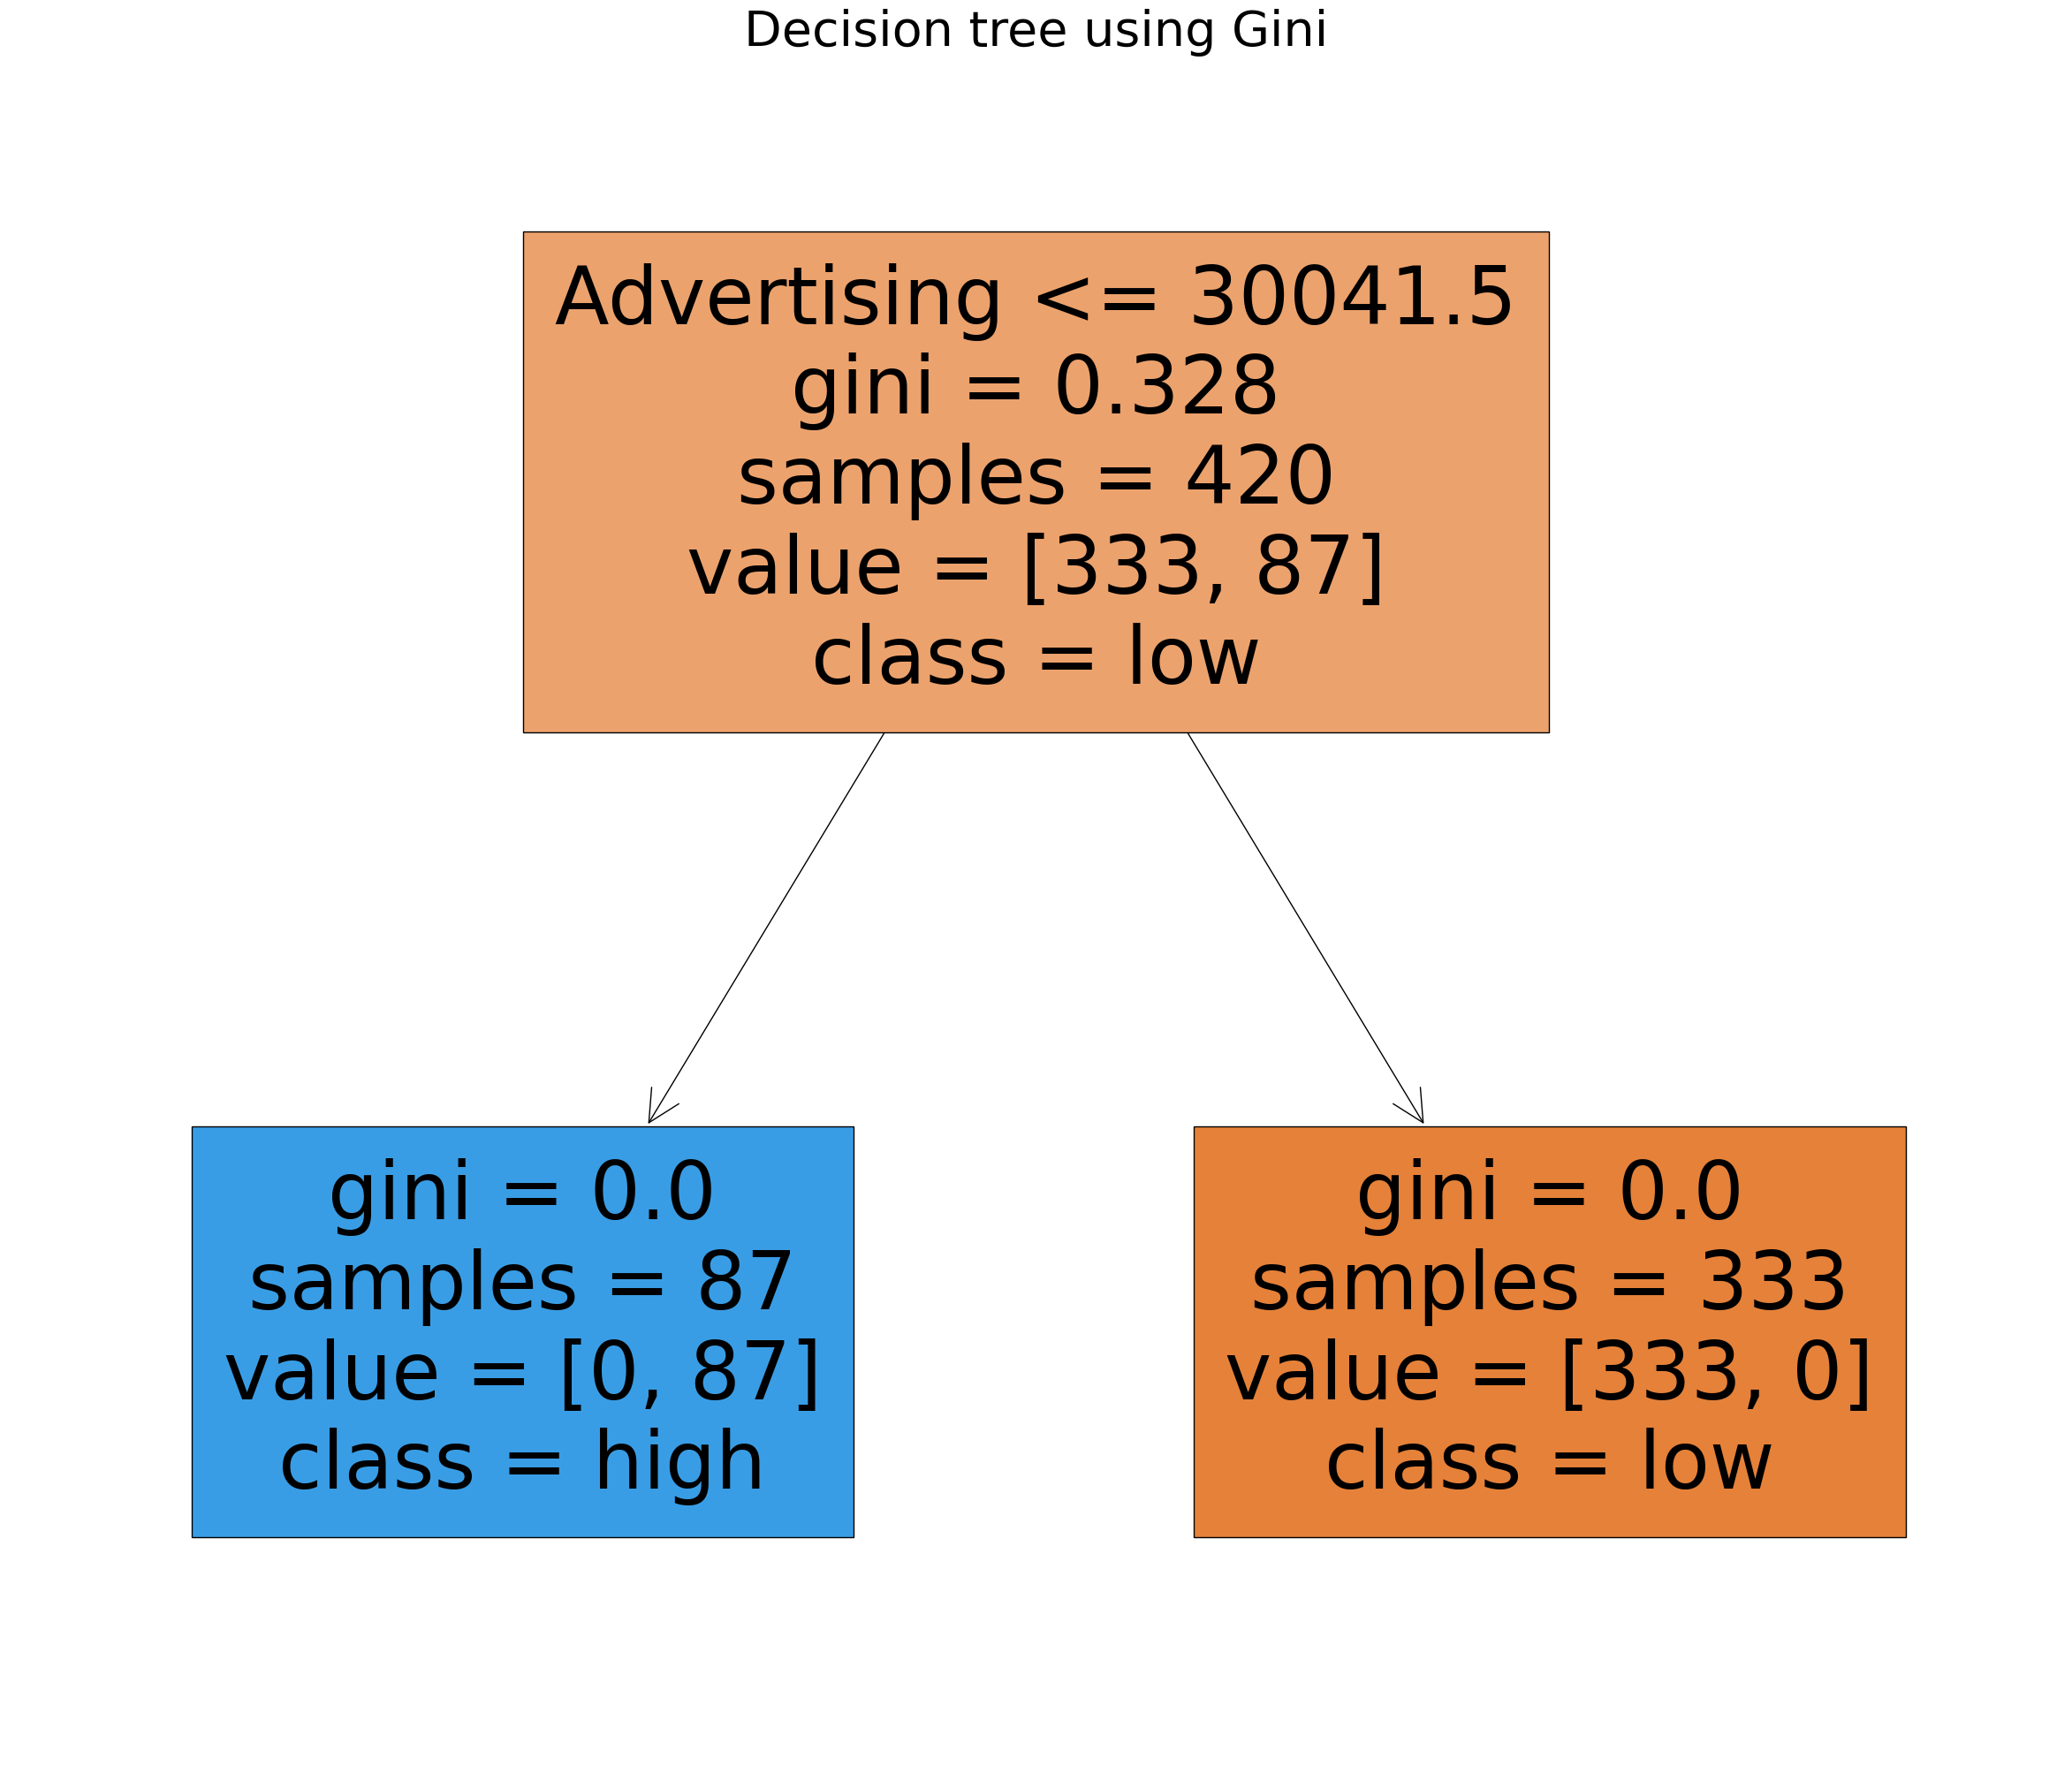

In [72]:
# let's plot the decision tree
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini1,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=40)
plt.savefig('DT_Gini.pdf')

# Conclusions:
#### 1. 1. Built and trained a Decision Tree Classifier Model using Entropy and Gini Criterion.
#### 2. The Accuracy of the Model using Entropy Criteria performig depth tuning showed perfect accuracy.
#### 3. The Accuracy of the Model using Gini Criteria performig depth tuning also showed a perfect accuracy score.
#### 4. The Model is performing exceptionally well on the given test data.
#### 5. The Model is making perfect predictions without any errors.